# Date time object - Rolling and Expanding Windows

# 1. Rolling Windows

A rolling window (also known as a "moving window" or "sliding window") is a powerful technique used for time series data analysis. It involves creating a "window" of a fixed size that slides sequentially over the data points, performing a specified calculation on the data within each window.

What is a Rolling Window?

Imagine you have a series of daily measurements. A rolling window allows you to:

* Define a window size: For example, a "7-day window."
* Slide that window: Move it day by day across your data.
* Perform a calculation: For each position of the window, calculate a statistic (like the average, sum, standard deviation, etc.) using only the data points currently inside that window.

Why is it used for Time Series Data?

Rolling windows are incredibly useful for:

* Smoothing Data: Calculating a rolling average (moving average) helps to remove short-term fluctuations and reveal underlying trends and cycles in the data.
* Feature Engineering: You can create new features that capture local statistics, such as a stock's 30-day moving average, 7-day volatility (rolling standard deviation), or the sum of sales over the last quarter.
* Detecting Changes: Shifts in rolling mean or standard deviation can indicate changes in the underlying process.
* Forecasting: Moving averages are a fundamental component of many basic forecasting models.

How it Works (Conceptual Example):

Let's say you have daily stock prices:

[10, 12, 11, 13, 14, 15, 12, 16, 17]

If you apply a 3-day rolling mean:

* Window 1 (Day 1-2): [10, 12] - Not enough data for a 3-day mean (often results in NaN).
* Window 2 (Day 1-3): [10, 12, 11] -> Mean = (10+12+11)/3 = 11.0 (This would be assigned to Day 3).
* Window 3 (Day 2-4): [12, 11, 13] -> Mean = (12+11+13)/3 = 12.0 (Assigned to Day 4).
* Window 4 (Day 3-5): [11, 13, 14] -> Mean = (11+13+14)/3 = 12.67 (Assigned to Day 5). And so on.

### A. Create the dataset

In [9]:
import pandas as pd
import numpy as np

print("Rolling Windows")

# Create a DataFrame with daily stock prices for a month
daily_prices = pd.DataFrame({
    'Close_Price': np.random.randint(90, 120, size=30)
}, index=pd.date_range(start='2025-05-01', periods=30, freq='D'))

print("Original Daily Prices (first 5 rows):\n", daily_prices.head())
print("Original Daily Prices (last 5 rows):\n", daily_prices.tail())

Rolling Windows
Original Daily Prices (first 5 rows):
             Close_Price
2025-05-01          117
2025-05-02          114
2025-05-03           91
2025-05-04          102
2025-05-05           98
Original Daily Prices (last 5 rows):
             Close_Price
2025-05-26          114
2025-05-27          112
2025-05-28          114
2025-05-29          106
2025-05-30          107


### B. 7-Day Rolling Mean (Simple Moving Average)

A 7-Day Rolling Mean, also known as a 7-Day Simple Moving Average (SMA), is a fundamental technique in time series analysis used to smooth out short-term fluctuations and identify underlying trends or cycles in data, specifically over a weekly period.

Here's a breakdown:

Simple Moving Average (SMA): It's an average of a specified number of consecutive data points. When you hear "moving average," it implies that this average is continuously recalculated as new data points become available.


"7-Day" Window:

* This specifies the window size. For each calculation, it considers the current data point and the preceding 6 data points, totaling 7 data points within the window.
* For example, if you have daily sales data, the 7-day rolling mean for a given Tuesday would be the average of the sales from that Tuesday, Monday, Sunday, Saturday, Friday, Thursday, and Wednesday.

Purpose and Calculation:

* Smoothing: The primary purpose is to filter out daily or short-term "noise" that might obscure the true underlying trend. By averaging over 7 days, it naturally dampens the impact of single erratic data points.
* Trend Identification: It helps to visualize and confirm the direction of a trend over a week. If the 7-day rolling mean is consistently increasing, it suggests an upward trend; if it's decreasing, a downward trend.
* Calculation: For each point in time, you sum up the values within the 7-day window and divide by 7. This average is then associated with the last day of that window (or the center of the window, depending on the implementation's center parameter in Pandas).

Example:

Let's say you have the following daily values (e.g., website visitors):

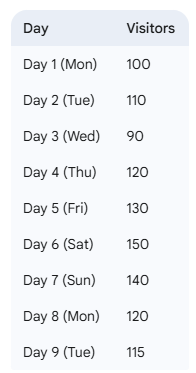

* 7-Day SMA for Day 7 (Sun): (100+110+90+120+130+150+140)/7=120
* 7-Day SMA for Day 8 (Mon): (110+90+120+130+150+140+120)/7=124
* 7-Day SMA for Day 9 (Tue): (90+120+130+150+140+120+115)/7=123.57

In [10]:
# 7-Day Rolling Mean (Simple Moving Average)
print("7-Day Rolling Mean (SMA)")
# Calculates the average of the current day and the previous 6 days

daily_prices['7_Day_SMA'] = daily_prices['Close_Price'].rolling(window=7).mean()
daily_prices.head(10)
# Show more rows to see NaN values at the start
# Note: The first 6 values are NaN because there aren't 7 data points yet

7-Day Rolling Mean (SMA)


,Close_Price,7_Day_SMA
2025-05-01,117,NaN
2025-05-02,114,NaN
2025-05-03,91,NaN
2025-05-04,102,NaN
2025-05-05,98,NaN
2025-05-06,105,NaN
2025-05-07,104,104.428571
2025-05-08,98,101.714286
2025-05-09,97,99.285714
2025-05-10,109,101.857143


### C. 5-Day Rolling Standard Deviation with minimum periods

This code is calculating a measure of price volatility (how much the Close_Price fluctuates) over a 5-day period. By using min_periods=1, you get a continuous standard deviation series from the very beginning of your data, allowing you to see how volatility evolves even in the initial stages when a full 5-day history isn't yet available.

In [11]:
# 5-Day Rolling Standard Deviation with minimum periods

print("5-Day Rolling Std Dev (min_periods=1)")
# Calculates standard deviation. min_periods=1 allows calculation even with few initial points.

daily_prices['5_Day_Std'] = daily_prices['Close_Price'].rolling(window=5, min_periods=1).std()
daily_prices.head(7)
# Show early calculations that are not NaN

5-Day Rolling Std Dev (min_periods=1)


,Close_Price,7_Day_SMA,5_Day_Std
2025-05-01,117,NaN,NaN
2025-05-02,114,NaN,2.121320
2025-05-03,91,NaN,14.224392
2025-05-04,102,NaN,11.916375
2025-05-05,98,NaN,10.922454
2025-05-06,105,NaN,8.514693
2025-05-07,104,104.428571,5.700877


### D. 3-Day Rolling Sum using a Time Offset

This code calculates the total Close_Price accumulated over the last 3 calendar days for each entry in your time series. It's a useful way to track short-term price accumulation, especially when dealing with time series that may have irregular or missing dates, ensuring your window consistently covers a specific chronological period.

In [12]:
# 3-Day Rolling Sum using a Time Offset

print("3-Day Rolling Sum (Time Offset)")
# Calculates the sum over the last 3 calendar days (robust to missing days)

daily_prices['3_Day_Sum'] = daily_prices['Close_Price'].rolling(window='3D').sum()
daily_prices.tail(5)
# Show recent results

3-Day Rolling Sum (Time Offset)


,Close_Price,7_Day_SMA,5_Day_Std,3_Day_Sum
2025-05-26,114,103.857143,11.696153,331.0
2025-05-27,112,106.571429,7.141428,325.0
2025-05-28,114,108.428571,7.266361,340.0
2025-05-29,106,110.714286,6.480741,332.0
2025-05-30,107,110.000000,3.847077,327.0


# 2. Expanding Windows (.expanding())

In Pandas, the Expanding Window (.expanding()) function is another powerful tool for analyzing time series data, distinct from rolling windows. While a rolling window maintains a fixed size as it slides, an expanding window grows to include all data points from the beginning of the series up to the current point in time.

What is an Expanding Window?

An expanding window calculates a statistic (like a mean, sum, or standard deviation) over an ever-increasing subset of the data.

* Starts Small: For the first data point, the window contains only that point.
* Grows Cumulatively: For the second data point, the window contains the first two data points. For the third, it contains the first three, and so on.
* Includes All Past Data: By the time you reach the last data point in the series, the expanding window will encompass all data points from the very beginning of the series up to that final point.

Why is it used for Time Series Data?

Expanding windows are particularly useful for:

* Cumulative Statistics: To track the cumulative average, cumulative sum, or other cumulative metrics over the entire history of the data. For example, a "running average since inception."
* Historical Trends: To understand how a metric has evolved over its entire observed lifespan, providing a long-term perspective.
* Benchmarking: To compare current performance against the total historical average or total historical maximum/minimum.
* Feature Engineering: Creating features that represent the "all-time" or "since-start" performance up to a given point.

How it Works (Conceptual Example):

Let's use the same daily sales data:

[10, 12, 11, 15, 14, 18, 16, 20, 19, 22]

If you apply an Expanding Mean:

* Window 1 (Day 1): [10] -> Mean = 10.0
* Window 2 (Day 1-2): [10, 12] -> Mean = (10+12)/2 = 11.0
* Window 3 (Day 1-3): [10, 12, 11] -> Mean = (10+12+11)/3 = 11.0
* Window 4 (Day 1-4): [10, 12, 11, 15] -> Mean = (10+12+11+15)/4 = 12.0
* ...and so on, until the last data point.

### A. Create the dataset

In [13]:
import pandas as pd
import numpy as np

print("Expanding Windows ")

# Create a DataFrame with daily stock prices for a month
daily_prices = pd.DataFrame({
    'Close_Price': np.random.randint(90, 120, size=30)
}, index=pd.date_range(start='2025-05-01', periods=30, freq='D'))

# Using the same daily_prices DataFrame from above
print("Original Daily Prices (first 5 rows):\n", daily_prices.head())

Expanding Windows 
Original Daily Prices (first 5 rows):
             Close_Price
2025-05-01          100
2025-05-02           97
2025-05-03          102
2025-05-04          108
2025-05-05           94


### B. Expanding Mean (Cumulative Average)

The Expanding Mean, also known as the Cumulative Average, is a type of moving average where the calculation window grows with each new data point, always encompassing all data from the beginning of the series up to the current point in time. Unlike a rolling mean which uses a fixed-size window, the expanding mean's window continuously expands. In the provided code, daily_prices['Close_Price'].expanding().mean() calculates this: for each day, it averages the Close_Price from the very first day up to that specific day. This is useful for observing the overall long-term average trend as more data accumulates, providing insight into the dataset's central tendency over its entire history.

In [14]:
# Expanding Mean (Cumulative Average)

print("Expanding Mean (Cumulative Average)")
# The average of all data points from the beginning up to the current point
daily_prices['Cumulative_Avg'] = daily_prices['Close_Price'].expanding().mean()
print(daily_prices.head(10)) # Show the average gradually changing
print(daily_prices.tail(5))

Expanding Mean (Cumulative Average)
            Close_Price  Cumulative_Avg
2025-05-01          100      100.000000
2025-05-02           97       98.500000
2025-05-03          102       99.666667
2025-05-04          108      101.750000
2025-05-05           94      100.200000
2025-05-06           98       99.833333
2025-05-07          114      101.857143
2025-05-08          107      102.500000
2025-05-09          116      104.000000
2025-05-10          106      104.200000
            Close_Price  Cumulative_Avg
2025-05-26          104      104.000000
2025-05-27          118      104.518519
2025-05-28           97      104.250000
2025-05-29          115      104.620690
2025-05-30          112      104.866667


### C. Expanding Sum (Cumulative Sum)

This code calculates the Expanding Sum, also known as the Cumulative Sum, of the Close_Price column. Unlike a rolling window which has a fixed size, an expanding window starts with one data point and grows by one with each subsequent data point, always including all data points from the beginning of the series up to the current point. Thus, the Cumulative_Sum column will show the sum of all Close_Price values from the very first entry up to the current row, progressively increasing as you move down the time series, effectively tracking the running total of Close_Price.

In [15]:
# Expanding Sum (Cumulative Sum)

print("Expanding Sum (Cumulative Sum)")
# The sum of all data points from the beginning up to the current point
daily_prices['Cumulative_Sum'] = daily_prices['Close_Price'].expanding().sum()
print(daily_prices.tail(5)) # Shows the growing sum

Expanding Sum (Cumulative Sum)
            Close_Price  Cumulative_Avg  Cumulative_Sum
2025-05-26          104      104.000000          2704.0
2025-05-27          118      104.518519          2822.0
2025-05-28           97      104.250000          2919.0
2025-05-29          115      104.620690          3034.0
2025-05-30          112      104.866667          3146.0


### D. Expanding Standard Deviation

The code calculates the Expanding Standard Deviation for Close_Price. Unlike a rolling window which maintains a fixed size, an expanding window starts from the beginning of the time series and continuously grows to include all data points up to the current observation. Thus, daily_prices['Cumulative_Std'] = daily_prices['Close_Price'].expanding().std() computes the standard deviation of Close_Price from the very first data point up to each successive point in time. This provides a measure of the cumulative volatility of the prices as more data becomes available, reflecting the overall dispersion of the entire historical series up to that moment. Note that for standard deviation, a minimum of two data points are required, so the first entry in the Cumulative_Std column will be NaN.

In [8]:
# Expanding Standard Deviation

print("Expanding Standard Deviation")

# The standard deviation of all data points from the beginning up to the current point
daily_prices['Cumulative_Std'] = daily_prices['Close_Price'].expanding().std()
daily_prices.head(10)
# Shows how std dev can be NaN for first few points (min 2 for std)

Expanding Standard Deviation


,Close_Price,7_Day_SMA,5_Day_Std,3_Day_Sum,Cumulative_Sum,Cumulative_Std
2025-05-01,91,NaN,NaN,91.0,91.0,NaN
2025-05-02,91,NaN,0.000000,182.0,182.0,0.000000
2025-05-03,101,NaN,5.773503,283.0,283.0,5.773503
2025-05-04,105,NaN,7.118052,297.0,388.0,7.118052
2025-05-05,106,NaN,7.362065,312.0,494.0,7.362065
2025-05-06,111,NaN,7.496666,322.0,605.0,8.256311
2025-05-07,115,102.857143,5.458938,332.0,720.0,9.245333
2025-05-08,100,104.142857,5.770615,326.0,820.0,8.618916
2025-05-09,103,105.857143,6.041523,318.0,923.0,8.063980
2025-05-10,119,108.428571,7.987490,322.0,1042.0,9.211104


# COMPLETED